<a href="https://colab.research.google.com/github/2303A51833/ADM/blob/main/Lab_6_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
# Create a synthetic  dataset
np.random.seed(42)
data=np.random.normal(0,1,100)  #Normal Distribution
outliers=np.random.uniform(5,10,5) #Aritficial Outlines

In [ ]:
data_with_outliers=np.concatenate((data,outliers))

In [ ]:
data

array([ 0.49671415, -0.1382643 ,  0.64768854,  1.52302986, -0.23415337,
       -0.23413696,  1.57921282,  0.76743473, -0.46947439,  0.54256004,
       -0.46341769, -0.46572975,  0.24196227, -1.91328024, -1.72491783,
       -0.56228753, -1.01283112,  0.31424733, -0.90802408, -1.4123037 ,
        1.46564877, -0.2257763 ,  0.0675282 , -1.42474819, -0.54438272,
        0.11092259, -1.15099358,  0.37569802, -0.60063869, -0.29169375,
       -0.60170661,  1.85227818, -0.01349722, -1.05771093,  0.82254491,
       -1.22084365,  0.2088636 , -1.95967012, -1.32818605,  0.19686124,
        0.73846658,  0.17136828, -0.11564828, -0.3011037 , -1.47852199,
       -0.71984421, -0.46063877,  1.05712223,  0.34361829, -1.76304016,
        0.32408397, -0.38508228, -0.676922  ,  0.61167629,  1.03099952,
        0.93128012, -0.83921752, -0.30921238,  0.33126343,  0.97554513,
       -0.47917424, -0.18565898, -1.10633497, -1.19620662,  0.81252582,
        1.35624003, -0.07201012,  1.0035329 ,  0.36163603, -0.64

In [ ]:
data.min()

-2.6197451040897444

In [ ]:
data.max()

1.8522781845089378

In [ ]:
# Convert to DataFrame
df=pd.DataFrame(data_with_outliers,columns=['Value'])

In [ ]:
# Step 1: Detect Outliners using IQR method
Q1=df['Value'].quantile(0.25)
Q3=df['Value'].quantile(0.75)
IQR=Q3-Q1
lowerbound=Q1-1.5*IQR
upperbound=Q3+1.5*IQR
print(lowerbound)
print(upperbound)




-2.3232332563637335
2.372622015963629


In [ ]:
# Identifying Outliners based on IQR
outliners_iqr=df[(df['Value']<lowerbound) | (df['Value']>upperbound)]

In [ ]:
# Step 2: Detect Outliners using Z-Score method
z_scores=stats.zscore(df['Value'])
outliners_zscore=df[np.abs(z_scores)>3]

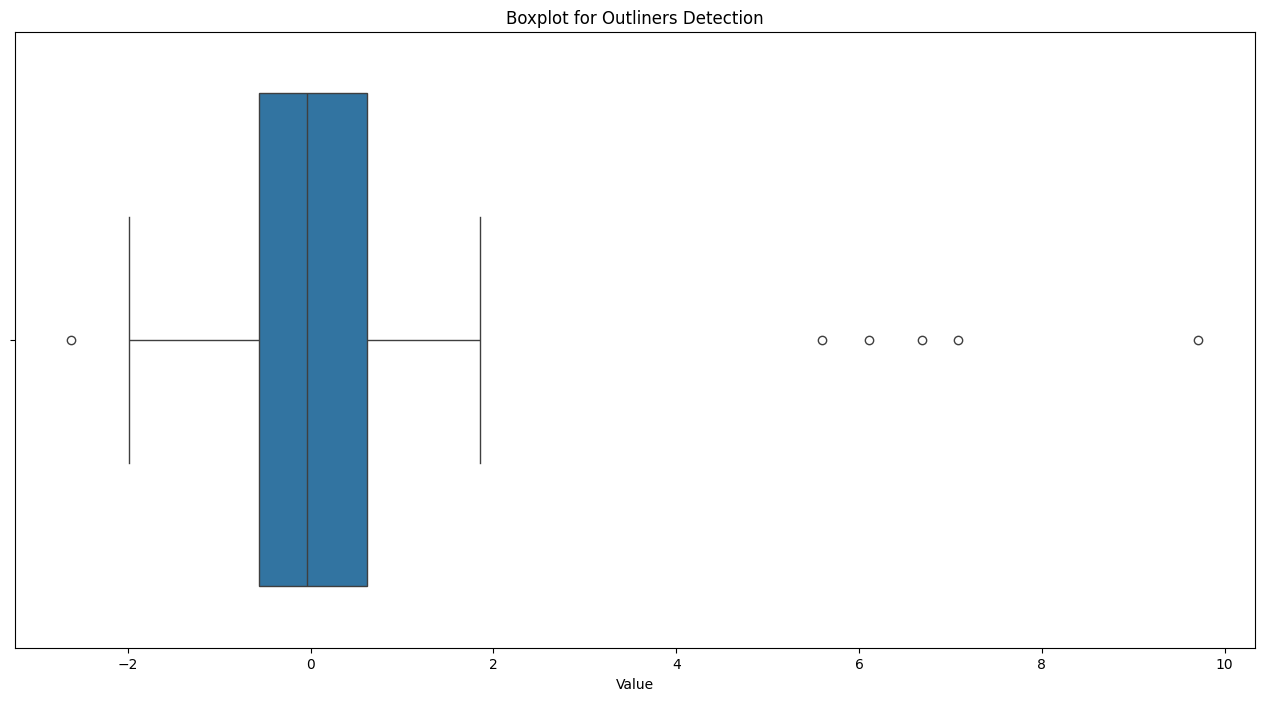

In [37]:
# Step 3: Visualise outliners using a boxplot
plt.figure(figsize=(16,8))
sns.boxplot(x=df['Value'])
plt.title('Boxplot for Outliners Detection')
plt.show()

In [34]:
# Step 4: Handle Ouliners
#Capping :set outliners to the upper and lower bounds
df_capped=df.copy()
df_capped['Value']=np.clip(df_capped['Value'],lowerbound,upperbound)



In [42]:
# Removal : Drop rows with Outliners
df_removed=df.copy()
df_removed=df_removed[(df_removed['Value']>=lowerbound) &
(df_removed['Value']<=upperbound)]


In [45]:
# Imputation : Replace outliners with the median
df_imputed=df.copy()
# Imputation : Replace outliners with the median
df_imputed=df.copy()
median_value=df_imputed['Value'].median()
df_imputed['Value'] = np.where((df_imputed['Value']>upperbound) & (df_imputed['Value']<lowerbound), median_value, df_imputed['Value'])


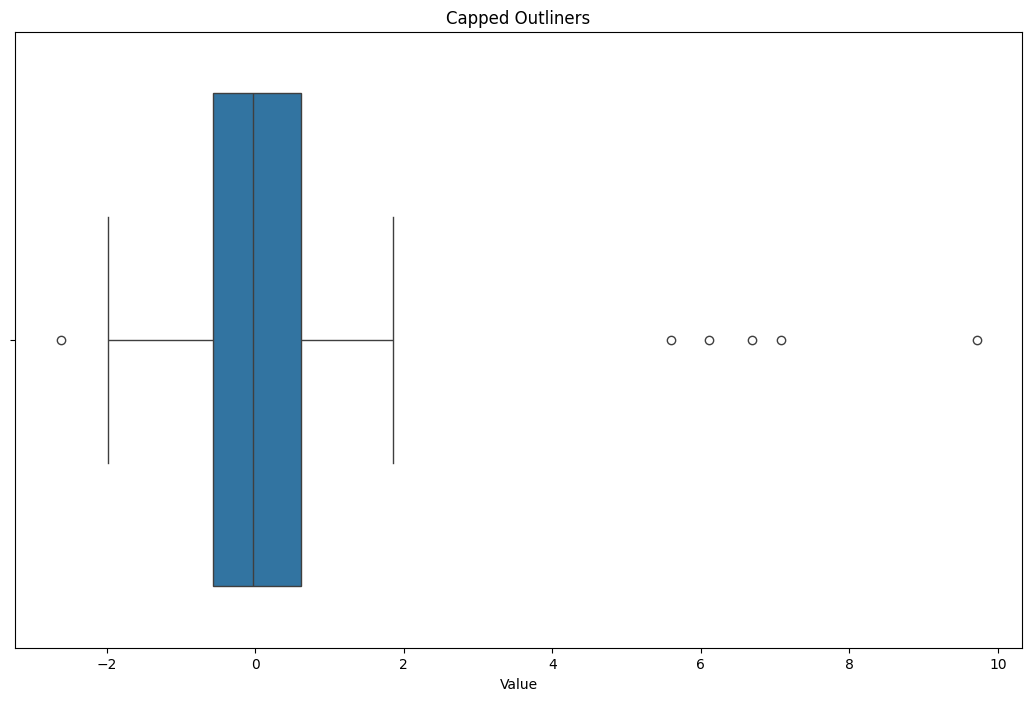

In [47]:
# Step 5: Visualise handled data
plt.figure(figsize=(13,8))
sns.boxplot(x=df_imputed['Value'])
plt.title('Capped Outliners')
plt.show()